![iut](stock_image\IUT200.png)
<hr style="margin-bottom: 40px;">


# STEM Jobs Salaries - Classification

## Classification

#### Classification is a fundamental task in machine learning and data analysis that involves categorizing data into predefined classes or categories based on their features or attributes. It is a supervised learning technique where the goal is to train a model on labeled training data to make accurate predictions on unseen or test data.

[Link to the Data used in this Notebook](https://drive.google.com/file/d/1IhXv0qcq7YFfBxc0BQB1-z74wF40ZnZn/view?usp=share_link)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Data Extraction - Importing Modules

 During the data extraction phase, we obtained the data directly from [kaggle.com](www.kaggle.com), which is a popular platform for accessing and sharing datasets. By using Kaggle, we were able to search for and download datasets that were relevant to our analysis which in this case is STEM Jobs Salaries, and we could be confident in the quality of the data provided, as the usability of it was rated 10 in the website. Overall, the data extraction phase was streamlined and efficient, thanks to the availability and accessibility of high-quality data on Kaggle.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=pd.errors.ParserWarning)
%matplotlib inline


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Loading The Initial Data:

In [6]:
!head data/STEMJobs.csv
# Note: incase if you are running this line locally you will be met with the error below
# as this notebook is meant to be executed in Google Colab

'head' is not recognized as an internal or external command,
operable program or batch file.


In [150]:
Data = pd.read_csv(
    'data/STEM.csv',
    parse_dates=['Timestamp'])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Data First Look:

In [103]:
Data.head()

,Timestamp,Company,Level,Title,TotalYearlyCompensation,Country,IsUS,IsCA,IsID,IsIN,...,Tag,BaseSalary,StockGrantValue,Bonus,Gender,IsMale,IsFemale,Masters_Degree,Bachelors_Degree,Education
0,2021-04-04 06:10:00,IBM,Band 10,Technical Program Manager,176000,AE,0,0,0,0,...,Customer Success,180000,0.0,0.0,Male,1,0,0,1,Bachelor's Degree
1,2020-05-27 04:31:00,Google,6,Solution Architect,350000,AE,0,0,0,0,...,API Development (Back-End),190000,100000.0,60000.0,NaN,0,0,0,0,NaN
2,2020-09-03 23:29:00,EY,Senior Manao,Management Consultant,245000,AE,0,0,0,0,...,Operations,195000,40000.0,10000.0,Male,1,0,1,0,Master's Degree
3,2021-07-21 04:23:00,IBM,Band 9,Marketing,698000,AE,0,0,0,0,...,Marketing,696000,0.0,2000.0,NaN,0,0,0,0,NaN
4,2020-11-03 16:48:00,Careem,L7,Product Manager,290000,AE,0,0,0,0,...,Product,190000,100000.0,0.0,Male,1,0,1,0,Master's Degree


In [104]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50130 entries, 0 to 50129
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp                50130 non-null  datetime64[ns]
 1   Company                  50128 non-null  object        
 2   Level                    50020 non-null  object        
 3   Title                    50130 non-null  object        
 4   TotalYearlyCompensation  50130 non-null  int64         
 5   Country                  50130 non-null  object        
 6   IsUS                     50130 non-null  int64         
 7   IsCA                     50130 non-null  int64         
 8   IsID                     50130 non-null  int64         
 9   IsIN                     50130 non-null  int64         
 10  IsDE                     50130 non-null  int64         
 11  YearsOfExperience        50130 non-null  float64       
 12  YearsAtCompany           50130 n

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Data Types


In [105]:
Data.dtypes

Timestamp                  datetime64[ns]
Company                            object
Level                              object
Title                              object
TotalYearlyCompensation             int64
Country                            object
IsUS                                int64
IsCA                                int64
IsID                                int64
IsIN                                int64
IsDE                                int64
YearsOfExperience                 float64
YearsAtCompany                    float64
Tag                                object
BaseSalary                          int64
StockGrantValue                   float64
Bonus                             float64
Gender                             object
IsMale                              int64
IsFemale                            int64
Masters_Degree                      int64
Bachelors_Degree                    int64
Education                          object
dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Experienced, Non-experienced Classification



In [151]:
Data['Experienced'] = pd.cut(Data['YearsOfExperience'], bins=[0, 8 , Data.YearsOfExperience.max()], labels=['Unexperienced', 'Experienced'])
Data

,Timestamp,Company,Level,Title,TotalYearlyCompensation,Country,IsUS,IsCA,IsID,IsIN,...,BaseSalary,StockGrantValue,Bonus,Gender,IsMale,IsFemale,Masters_Degree,Bachelors_Degree,Education,Experienced
0,2021-04-04 06:10:00,IBM,Band 10,Technical Program Manager,176000,AE,0,0,0,0,...,180000,0.0,0.0,Male,1,0,0,1,Bachelor's Degree,Experienced
1,2020-05-27 04:31:00,Google,6,Solution Architect,350000,AE,0,0,0,0,...,190000,100000.0,60000.0,NaN,0,0,0,0,NaN,Experienced
2,2020-09-03 23:29:00,EY,Senior Manao,Management Consultant,245000,AE,0,0,0,0,...,195000,40000.0,10000.0,Male,1,0,1,0,Master's Degree,Experienced
3,2021-07-21 04:23:00,IBM,Band 9,Marketing,698000,AE,0,0,0,0,...,696000,0.0,2000.0,NaN,0,0,0,0,NaN,Experienced
4,2020-11-03 16:48:00,Careem,L7,Product Manager,290000,AE,0,0,0,0,...,190000,100000.0,0.0,Male,1,0,1,0,Master's Degree,Experienced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50125,2021-03-29 23:49:00,Amazon,L5,Software Engineer,77000,ZA,0,0,0,0,...,57000,20000.0,0.0,Male,1,0,0,1,Bachelor's Degree,Unexperienced
50126,2021-02-05 04:55:00,Oracle,M3,Software Engineering Manager,167000,ZA,0,0,0,0,...,80000,87000.0,0.0,Male,1,0,0,1,Bachelor's Degree,Unexperienced
50127,2021-07-20 07:31:00,Amazon,L5,Software Engineer,86000,ZA,0,0,0,0,...,61000,12000.0,12000.0,Male,1,0,1,0,Master's Degree,Unexperienced
50128,2020-09-14 05:44:00,AMazon,L5,Software Engineer,101000,ZA,0,0,0,0,...,41000,60000.0,0.0,Male,1,0,0,1,Bachelor's Degree,Unexperienced


Unexperienced    29891
Experienced      16665
Name: Experienced, dtype: int64


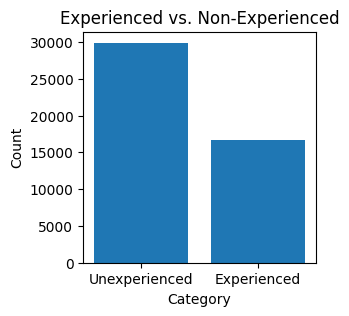

In [152]:
exp_counts = Data.Experienced.value_counts()
print(exp_counts)

plt.figure(figsize=(3, 3))
plt.bar(exp_counts.index, exp_counts.values)
plt.title('Experienced vs. Non-Experienced')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Data Discretization


In [153]:
deciles = pd.qcut(Data['TotalYearlyCompensation'], q=2, labels=False, duplicates='drop')
decile_table = Data.groupby(deciles)['TotalYearlyCompensation'].describe()
print(decile_table)

                           count           mean            std       min  \
TotalYearlyCompensation                                                    
0                        25130.0  121720.768245   42636.914412   10000.0   
1                        25000.0  300204.340000  134394.581853  184000.0   

                              25%       50%       75%        max  
TotalYearlyCompensation                                           
0                         92000.0  130000.0  157000.0   183000.0  
1                        215000.0  260000.0  339000.0  2500000.0  


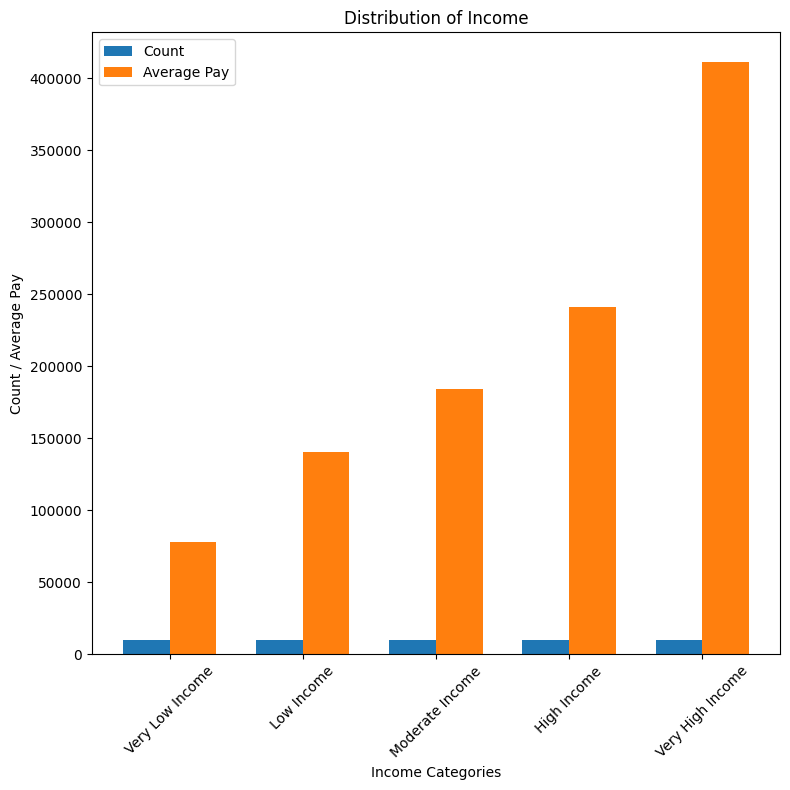

In [154]:
labels = ['Very Low Income', 'Low Income', 'Moderate Income', 'High Income', 'Very High Income']
counts = [10203, 9988, 9993, 9921, 10025]
pay = [78290, 140733, 184321, 241417, 411220]

# bar width
bar_width = 0.35

# array indices for the x axis
x = np.arange(len(labels))

# bar chart
plt.figure(figsize=(8, 8))
plt.bar(x - bar_width/2, counts, bar_width, label='Count')
plt.bar(x + bar_width/2, pay, bar_width, label='Average Pay')

# label and titles
plt.xlabel('Income Categories')
plt.ylabel('Count / Average Pay')
plt.title('Distribution of Income')
plt.xticks(x, labels, rotation=45)
plt.legend()

# displaying the chart
plt.tight_layout()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Binary Encoding - Experienced


In [155]:
Data.Experienced = np.where(Data.Experienced == 'Experienced', 1, 0)
Data

,Timestamp,Company,Level,Title,TotalYearlyCompensation,Country,IsUS,IsCA,IsID,IsIN,...,BaseSalary,StockGrantValue,Bonus,Gender,IsMale,IsFemale,Masters_Degree,Bachelors_Degree,Education,Experienced
0,2021-04-04 06:10:00,IBM,Band 10,Technical Program Manager,176000,AE,0,0,0,0,...,180000,0.0,0.0,Male,1,0,0,1,Bachelor's Degree,1
1,2020-05-27 04:31:00,Google,6,Solution Architect,350000,AE,0,0,0,0,...,190000,100000.0,60000.0,NaN,0,0,0,0,NaN,1
2,2020-09-03 23:29:00,EY,Senior Manao,Management Consultant,245000,AE,0,0,0,0,...,195000,40000.0,10000.0,Male,1,0,1,0,Master's Degree,1
3,2021-07-21 04:23:00,IBM,Band 9,Marketing,698000,AE,0,0,0,0,...,696000,0.0,2000.0,NaN,0,0,0,0,NaN,1
4,2020-11-03 16:48:00,Careem,L7,Product Manager,290000,AE,0,0,0,0,...,190000,100000.0,0.0,Male,1,0,1,0,Master's Degree,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50125,2021-03-29 23:49:00,Amazon,L5,Software Engineer,77000,ZA,0,0,0,0,...,57000,20000.0,0.0,Male,1,0,0,1,Bachelor's Degree,0
50126,2021-02-05 04:55:00,Oracle,M3,Software Engineering Manager,167000,ZA,0,0,0,0,...,80000,87000.0,0.0,Male,1,0,0,1,Bachelor's Degree,0
50127,2021-07-20 07:31:00,Amazon,L5,Software Engineer,86000,ZA,0,0,0,0,...,61000,12000.0,12000.0,Male,1,0,1,0,Master's Degree,0
50128,2020-09-14 05:44:00,AMazon,L5,Software Engineer,101000,ZA,0,0,0,0,...,41000,60000.0,0.0,Male,1,0,0,1,Bachelor's Degree,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Label Column - Income


In [156]:
labels = ['Lowerclass']
Data['IncomeLevel'] = pd.cut(Data['TotalYearlyCompensation'], bins=[0, 210000 , Data.TotalYearlyCompensation.max()], labels=['LowerClass', 'HigherClass'])
Data

,Timestamp,Company,Level,Title,TotalYearlyCompensation,Country,IsUS,IsCA,IsID,IsIN,...,StockGrantValue,Bonus,Gender,IsMale,IsFemale,Masters_Degree,Bachelors_Degree,Education,Experienced,IncomeLevel
0,2021-04-04 06:10:00,IBM,Band 10,Technical Program Manager,176000,AE,0,0,0,0,...,0.0,0.0,Male,1,0,0,1,Bachelor's Degree,1,LowerClass
1,2020-05-27 04:31:00,Google,6,Solution Architect,350000,AE,0,0,0,0,...,100000.0,60000.0,NaN,0,0,0,0,NaN,1,HigherClass
2,2020-09-03 23:29:00,EY,Senior Manao,Management Consultant,245000,AE,0,0,0,0,...,40000.0,10000.0,Male,1,0,1,0,Master's Degree,1,HigherClass
3,2021-07-21 04:23:00,IBM,Band 9,Marketing,698000,AE,0,0,0,0,...,0.0,2000.0,NaN,0,0,0,0,NaN,1,HigherClass
4,2020-11-03 16:48:00,Careem,L7,Product Manager,290000,AE,0,0,0,0,...,100000.0,0.0,Male,1,0,1,0,Master's Degree,1,HigherClass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50125,2021-03-29 23:49:00,Amazon,L5,Software Engineer,77000,ZA,0,0,0,0,...,20000.0,0.0,Male,1,0,0,1,Bachelor's Degree,0,LowerClass
50126,2021-02-05 04:55:00,Oracle,M3,Software Engineering Manager,167000,ZA,0,0,0,0,...,87000.0,0.0,Male,1,0,0,1,Bachelor's Degree,0,LowerClass
50127,2021-07-20 07:31:00,Amazon,L5,Software Engineer,86000,ZA,0,0,0,0,...,12000.0,12000.0,Male,1,0,1,0,Master's Degree,0,LowerClass
50128,2020-09-14 05:44:00,AMazon,L5,Software Engineer,101000,ZA,0,0,0,0,...,60000.0,0.0,Male,1,0,0,1,Bachelor's Degree,0,LowerClass


In [157]:
income_counts = Data['IncomeLevel'].value_counts()
print(income_counts)

LowerClass     30867
HigherClass    19263
Name: IncomeLevel, dtype: int64


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Income Level Binary Encoding


In [158]:
Data.IncomeLevel = np.where(Data.IncomeLevel == 'HigherClass', 1, 0)
Data

frame = Data
frame.head()

,Timestamp,Company,Level,Title,TotalYearlyCompensation,Country,IsUS,IsCA,IsID,IsIN,...,StockGrantValue,Bonus,Gender,IsMale,IsFemale,Masters_Degree,Bachelors_Degree,Education,Experienced,IncomeLevel
0,2021-04-04 06:10:00,IBM,Band 10,Technical Program Manager,176000,AE,0,0,0,0,...,0.0,0.0,Male,1,0,0,1,Bachelor's Degree,1,0
1,2020-05-27 04:31:00,Google,6,Solution Architect,350000,AE,0,0,0,0,...,100000.0,60000.0,NaN,0,0,0,0,NaN,1,1
2,2020-09-03 23:29:00,EY,Senior Manao,Management Consultant,245000,AE,0,0,0,0,...,40000.0,10000.0,Male,1,0,1,0,Master's Degree,1,1
3,2021-07-21 04:23:00,IBM,Band 9,Marketing,698000,AE,0,0,0,0,...,0.0,2000.0,NaN,0,0,0,0,NaN,1,1
4,2020-11-03 16:48:00,Careem,L7,Product Manager,290000,AE,0,0,0,0,...,100000.0,0.0,Male,1,0,1,0,Master's Degree,1,1


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## LogReg for Experienced



In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

x = Data.drop(['YearsOfExperience', 'Experienced', 'Timestamp', 'Level', 'Company', 'Title', 'Country', 'IsUS', 'IsCA', 'IsID', 'IsIN'
               , 'IsDE', 'Tag', 'Gender', 'Education'], axis=1)
y = Data.Experienced



x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)



model = LogisticRegression()

scores = cross_val_score(model, x_train, y_train, cv=5)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Cross-Validation Scores:", scores)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC-ROC:", auc_roc)

cm = confusion_matrix(y_test, y_pred)
print(cm)


Cross-Validation Scores: [0.69467647 0.69380377 0.69579853 0.71412542 0.6978803 ]
Accuracy: 0.7149411530021943
F1 Score: 0.5072413793103449
Precision: 0.6121514773200166
Recall: 0.4330291433617898
AUC-ROC: 0.6462173926191964
[[5697  932]
 [1926 1471]]


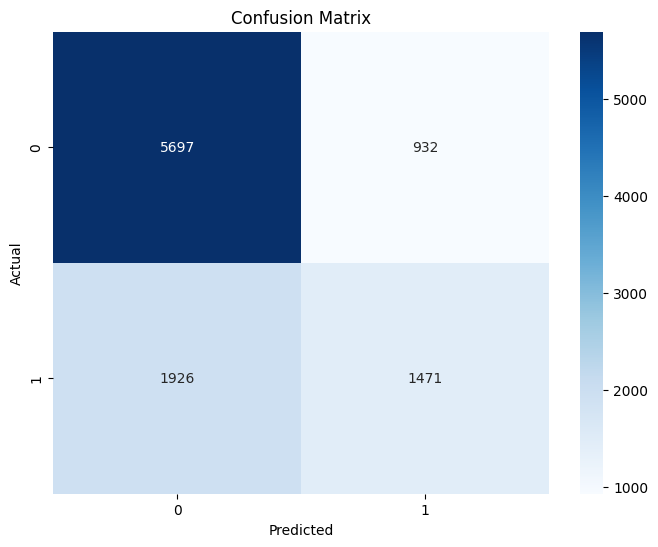

In [117]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'])
plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'])
plt.show()

0.7463918492661203


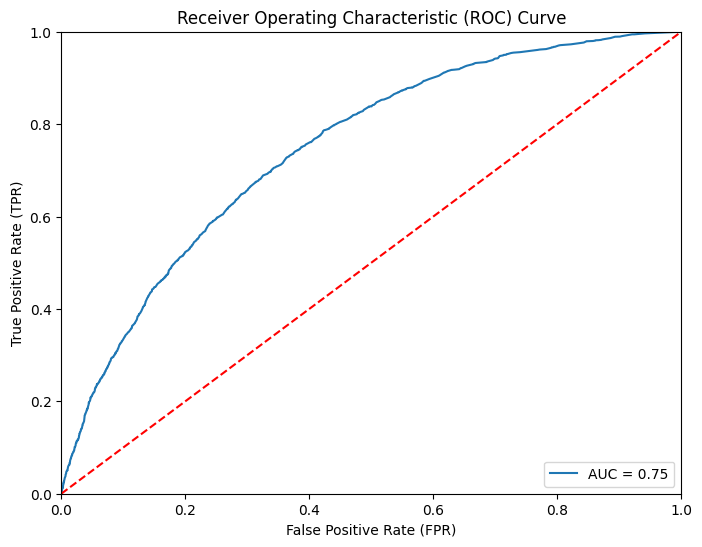

In [164]:
from sklearn.metrics import roc_curve, auc


# Assuming you have predicted probabilities or scores for the positive class
y_scores = model.predict_proba(x_test)[:, 1]

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_scores)

print(auc)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## KNN for Experienced



In [119]:
from sklearn.neighbors import KNeighborsClassifier


x = Data.drop(['YearsOfExperience', 'Experienced', 'Timestamp', 'Level', 'Company', 'Title', 'Country', 'IsUS', 'IsCA', 'IsID', 'IsIN'
               , 'IsDE', 'Tag', 'Gender', 'Education'], axis=1)
y = Data.Experienced


# Define the range of k values
k_values = range(1, 21)

# Create a dictionary to store the accuracy for each k
accuracy_scores = {}

# Iterate over each k value
for k in k_values:
    # Create and fit the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    # Predict labels for the test set
    y_pred = knn.predict(x_test)
    
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the accuracy in the dictionary
    accuracy_scores[k] = accuracy

# Sort the accuracy scores in descending order
sorted_accuracy = sorted(accuracy_scores.items(), key=lambda x: x[1], reverse=True)

# Print the accuracy scores for each k in descending order
for k, accuracy in sorted_accuracy:
    print(f"k = {k}: Accuracy = {accuracy}")

k = 19: Accuracy = 0.7470576501097147
k = 20: Accuracy = 0.7456612806702573
k = 17: Accuracy = 0.7448633552762817
k = 18: Accuracy = 0.7439656892080591
k = 15: Accuracy = 0.743865948533812
k = 16: Accuracy = 0.7418711350488729
k = 14: Accuracy = 0.7402752842609216
k = 11: Accuracy = 0.7396768402154399
k = 13: Accuracy = 0.739477358866946
k = 12: Accuracy = 0.7388789148214642
k = 7: Accuracy = 0.7386794334729703
k = 10: Accuracy = 0.7375822860562538
k = 9: Accuracy = 0.7369838420107719
k = 6: Accuracy = 0.7355874725713146
k = 8: Accuracy = 0.7354877318970676
k = 5: Accuracy = 0.7280071813285458
k = 4: Accuracy = 0.727608218631558
k = 3: Accuracy = 0.7209255934570118
k = 2: Accuracy = 0.7170357071613804
k = 1: Accuracy = 0.6995810891681628


In [120]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC-ROC:", auc_roc)

Accuracy: 0.7355874725713146
F1 Score: 0.5173857636992535
Precision: 0.6779580152671756
Recall: 0.4183102737709744
AUC-ROC: 0.6582424803762098


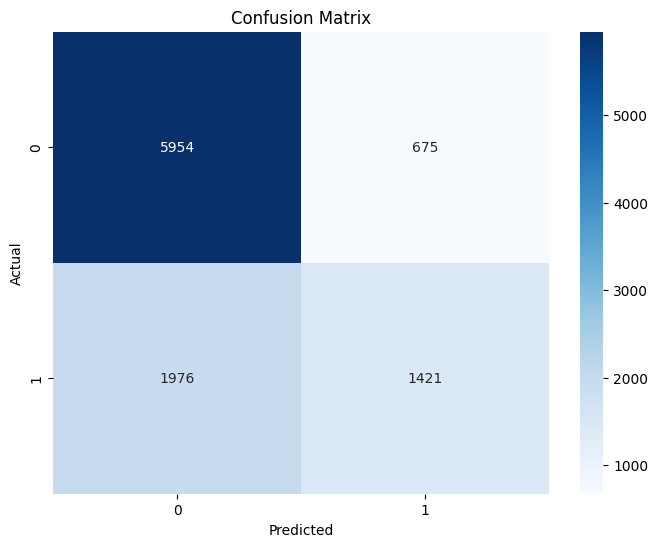

In [121]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'])
plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'])
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Random Forest for Experienced



In [122]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

# Create a Random Forest classifier with default parameters
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC-ROC:", auc_roc)


Accuracy: 0.7726910033911829
F1 Score: 0.6315278900565884
Precision: 0.6821515892420538
Recall: 0.5878988561107766
AUC-ROC: 0.7260794996544337


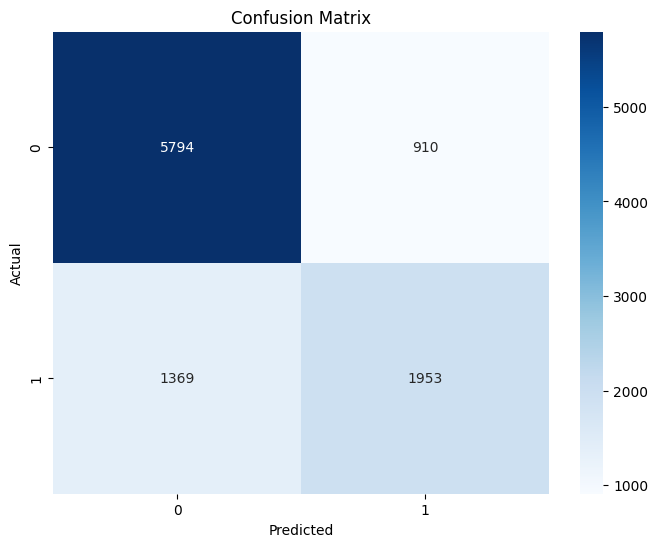

In [123]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'])
plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'])
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## LogReg for Income Level



In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)



model = LogisticRegression()

scores = cross_val_score(model, x_train, y_train, cv=5)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Cross-Validation Scores:", scores)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC-ROC:", auc_roc)

cm = confusion_matrix(y_test, y_pred)
print(cm)

C:\Users\Hexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConve

Cross-Validation Scores: [0.69816731 0.69305573 0.69679591 0.68482733 0.69925187]
Accuracy: 0.6930979453421106
F1 Score: 0.5237579322086364
Precision: 0.6573426573426573
Recall: 0.43529714432724465
AUC-ROC: 0.6458127682867695
[[5257  882]
 [2195 1692]]


C:\Users\Hexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


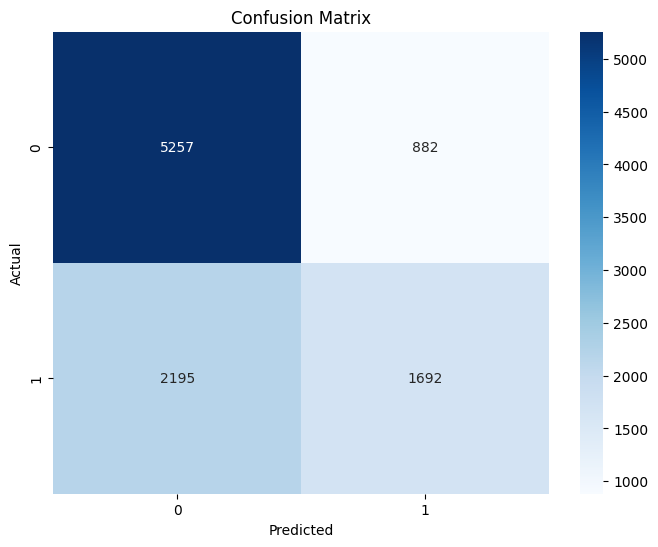

In [162]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'])
plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'])
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## KNN for Income Level



In [124]:
x = frame.drop(['Bonus', 'BaseSalary', 'StockGrantValue', 'TotalYearlyCompensation', 'Experienced', 'Timestamp', 'Level', 'Company', 'Title', 'Country', 'IsUS', 'IsCA', 'IsID', 'IsIN'
               , 'IsDE', 'Tag', 'Gender', 'Education', 'IncomeLevel'], axis=1)
y = frame[['IncomeLevel']]


# Define the range of k values
k_values = range(1, 21)

# Create a dictionary to store the accuracy for each k
accuracy_scores = {}

# Iterate over each k value
for k in k_values:
    # Create and fit the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    # Predict labels for the test set
    y_pred = knn.predict(x_test)
    
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the accuracy in the dictionary
    accuracy_scores[k] = accuracy

# Sort the accuracy scores in descending order
sorted_accuracy = sorted(accuracy_scores.items(), key=lambda x: x[1], reverse=True)

# Print the accuracy scores for each k in descending order
for k, accuracy in sorted_accuracy:
    print(f"k = {k}: Accuracy = {accuracy}")

k = 19: Accuracy = 0.7501496110113705
k = 18: Accuracy = 0.7475563534809495
k = 17: Accuracy = 0.7469579094354678
k = 20: Accuracy = 0.746359465389986
k = 16: Accuracy = 0.7453620586475165
k = 14: Accuracy = 0.7439656892080591
k = 11: Accuracy = 0.7436664671853181
k = 15: Accuracy = 0.7433672451625774
k = 13: Accuracy = 0.7430680231398364
k = 12: Accuracy = 0.7418711350488729
k = 10: Accuracy = 0.741571913026132
k = 9: Accuracy = 0.7398763215639338
k = 6: Accuracy = 0.737183323359266
k = 7: Accuracy = 0.737083582685019
k = 8: Accuracy = 0.736884101336525
k = 4: Accuracy = 0.7318970676241772
k = 5: Accuracy = 0.7318970676241772
k = 3: Accuracy = 0.7234191103131857
k = 2: Accuracy = 0.72262118491921
k = 1: Accuracy = 0.6950927588270497


In [125]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
auc_roc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("AUC-ROC:", auc_roc)

Accuracy: 0.737183323359266
F1 Score: 0.6673010425789145
Precision: 0.7099260266229412
Recall: 0.6573873694427401
AUC-ROC: 0.6573873694427401


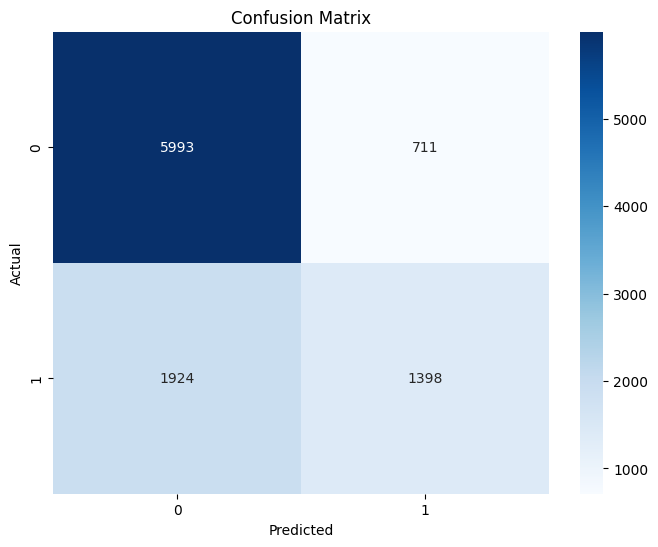

In [126]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'])
plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'])
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Random Forest for Income Level



In [159]:
x = frame.drop(['Bonus', 'BaseSalary', 'StockGrantValue', 'TotalYearlyCompensation', 'Experienced', 'Timestamp', 'Level', 'Company', 'Title', 'Country', 'IsUS', 'IsCA', 'IsID', 'IsIN'
               , 'IsDE', 'Tag', 'Gender', 'Education', 'IncomeLevel'], axis=1)
y = frame[['IncomeLevel']]


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)


# Create a Random Forest classifier with default parameters
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(x_test)

# Calculate the metrics of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)



C:\Users\Hexa\AppData\Local\Temp\ipykernel_3704\2974667609.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(x_train, y_train)


Accuracy: 0.6990823857969279
F1 Score: 0.5582076438717235
Precision: 0.6282135794330916
Recall: 0.502239789196311


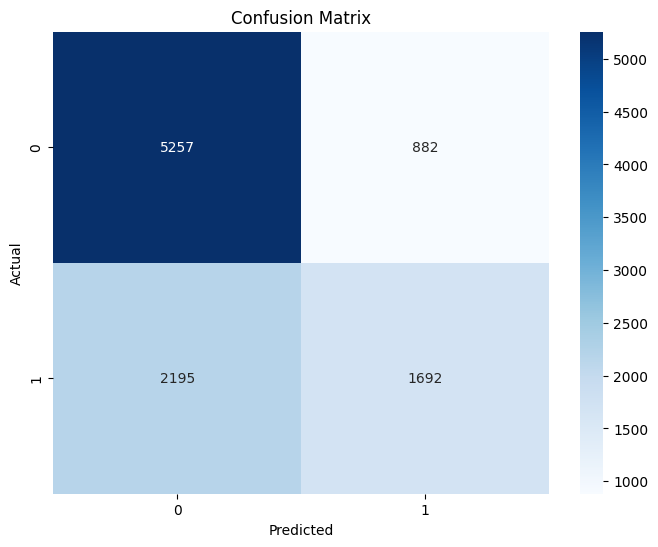

In [161]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'])
plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'])
plt.show()

## free me from this suffering

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
